# Obsah

> ## Úvod

> ## Knižnice

> ## Dataset

> ## Chýbajúce hodnoty

>> ### Zjednotenie formátov dát

>> ### Odvodenie chýbajúcich hodnôt po riadkoch

>> ### Doplnenie chýbajúcich hodnôt po stĺpcoch

> ## Vychýlené hodnoty

> ## Normalizácia údajov

> ## Transformácia numerických atribútov na kategorické

> ## Transformacia kategorických údajov na numerické

> ## Vytváranie atribútov kombinovanim

> ## Zdroje

## Doležité parametre
DecisionTreeClassifier(
criterion

max_depth=None

min_samples_leaf - počet pozorovani vo vyslednej podmnozine

class_weight=None

# Úvod
Na základe identifikovaných problémov v dátach a návrhu ich riešenia v predchádzajúcej fáze treba zrealizovať predspracovanie. Výsledkom by mala byť upravená dátová sada (vo formáte ​csv​) vo vhodnom tvare pre zvolený algoritmus strojového učenia (v našom prípade rozhodovacie stromy​). Zároveň, keďže predspracovaním sa mohol zmeniť tvar a charakteristiky dát (počet atribútov, distribúcie hodnôt a pod.), treba znovu zrealizovať podstatné časti prieskumnej analýzy, pričom v tejto fáze je potrebné zamerať sa aj na vzťahy medzi jednotlivými atribútmi.

# Knižnice

In [1088]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn import preprocessing
import math

#regular expression
import re

#Nastavenie rozmerov zobrazovaných grafov
plt.rcParams['figure.figsize'] = 9, 6
from IPython.display import Image

# Dataset

In [1089]:
file_path = "data/zadanie4/train.csv"
# Načítame si súbor s datasetom so separátom ',' a ako index nastavime prvý stĺpec
train_data = pd.read_csv(file_path, sep=',', index_col=0)
# Pomenujeme si index
train_data.index.name = 'id'
#train_data.info()

In [1090]:
file_path = "data/zadanie4/test.csv"
# Načítame si súbor s datasetom so separátom ',' a ako index nastavime prvý stĺpec
test_data = pd.read_csv(file_path, sep=',', index_col=0)
# Pomenujeme si index
test_data.index.name = 'id'
#test_data.info()

In [1091]:
#Aby sme mohli pracovat 
data = train_data
#data = test_data

In [1092]:
def fixWierdCharsInString(string):
    #ocisti string od bielych znakov a regex: nahrad znaky [ -], za _
    return re.sub('[ -]','_', str.strip(string))

In [1093]:
#Zjednotenie názvov stĺpcov
data = data.rename(columns=fixWierdCharsInString)

In [1094]:
data = data.rename(fixWierdCharsInString, axis='columns')
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'class', 'fnlwgt', 'education', 'education_num', 'relationship',
       'capital_gain', 'capital_loss', 'hours_per_week', 'date_of_birth',
       'personal_info'],
      dtype='object')

# Zjednotenie formátov dát

In [1095]:
#help(data.select_dtypes)
#Selektneme si vsetky atribúty, ktoré majú nejasný dátový
for col_name in data.select_dtypes('object'):
    #Spočítame si pre každý "kategorický" atribút počet jeho jedinečných hodnôt
    uniq_values_count = len(data[col_name].unique())
    # vypíšeme si počty
    print(col_name,":",uniq_values_count) 

sex : 3
on_thyroxine : 6
query_on_thyroxine : 2
on_antithyroid_medication : 2
sick : 2
pregnant : 2
thyroid_surgery : 2
I131_treatment : 2
query_hypothyroid : 2
query_hyperthyroid : 2
lithium : 2
goitre : 2
tumor : 2
hypopituitary : 2
psych : 2
TSH_measured : 2
T3_measured : 2
TT4_measured : 2
T4U_measured : 2
FTI_measured : 2
FTI : 210
TBG_measured : 1
TBG : 1
referral_source : 5
class : 2800
education : 16
relationship : 9
date_of_birth : 2457
personal_info : 700


Pre všetky vyššie atribúty nastavíme správny formát dát a prekonvertujeme na číselnú reprezentáciu, kvôli neskoršej klasifikácií.

In [1096]:
#help(data.to_numeric)
#If ‘coerce’, then invalid parsing will be set as NaN
#FTI prekonvertujeme na čísla
data['FTI'] = pd.to_numeric(data['FTI'], errors='coerce')

Zmena hodnôt **M -> Male** a **F -> Female**, **? -> NaN**. 


PJ NEROZUMIEM: Túto úpravu robíme kvôli tomu, aby sme pri upravovaní hodnôt F, f, T, t ... mohli upraviť tieto hodnoty globálne.

In [1097]:
data['sex'].value_counts()

F    1830
M     860
?     110
Name: sex, dtype: int64

In [1098]:
#Nastavíme pohlavie na jeden formát
data['sex'].replace(['F', 'M', '?'], [0, 1, np.NAN], inplace=True)
data['sex'].value_counts()

0.0    1830
1.0     860
Name: sex, dtype: int64

In [1099]:
data.rename(columns={'sex':'sex_male'})

,age,sex_male,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,class,fnlwgt,education,education_num,relationship,capital_gain,capital_loss,hours_per_week,date_of_birth,personal_info
id,,,,,,,,,,,,,,,,,,,,,
0,72.0,0.0,t,f,f,f,f,f,f,f,...,replacement therapy.|3560,140581,Some-college,1000,Unmarried,0.0,0,40,1946-02-03,Other-service|United-States\nWidowed -- privat...
1,52.0,0.0,f,f,f,f,f,f,f,f,...,negative.|311,180916,Some-college,10,Unmarried,0.0,0,38,1965-08-27,Adm-clerical|United-States\nSeparated -- Local...
2,62.0,1.0,F,f,f,f,f,f,f,f,...,negative.|3705,235853,HS-grad,-900,Husband,0.0,0,45,1955-04-15,Sales|United-States\nMarried-civ-spouse -- pri...
3,23.0,0.0,f,f,f,f,f,f,f,f,...,negative.|2668,121889,Some-college,10,Own-child,0.0,0,20,1994-03-26,Sales|United-States\nNever-married -- Private|...
4,63.0,0.0,t,f,f,f,f,f,f,f,...,replacement therapy.|1668,222490,Assoc-voc,11,Own_child,0.0,0,40,1955-01-21,Adm-clerical|United-States\nNever-married -- P...
5,56.0,0.0,f,f,f,f,f,f,f,f,...,negative.|2650,256191,HS-grad,9,Own-child,0.0,0,25,1961-12-10,?|United-States\nNever-married -- ?|Black
6,84.0,0.0,f,f,f,f,f,f,f,f,...,negative.|1485,203505,HS-grad,9,Not-in-family,0.0,0,40,1934-03-03,Adm-clerical|United-States\nWidowed -- Federal...
7,68.0,NaN,f,f,f,f,f,f,f,f,...,negative.|281,147202,Some-college,-1000,Not-in-family,0.0,0,45,1949-07-21,Adm-clerical|Germany\nDivorced -- Private|White
8,19.0,1.0,f,f,f,f,f,f,f,f,...,negative.|764,85625,Some-college,1000,Not-in-family,0.0,0,20,1999-01-06,Sales|United-States\nNever-married -- Private|...


Zmena hodnôt **f, F, FALSE -> False** a **t, T, TRUE -> True**

In [1100]:
data.replace(['f', 'F', 'FALSE', 't', 'T', 'TRUE'], [False, False, False, True, True, True], inplace=True)

Ujednotenie názvov v stĺpci **relationship**. 
Own-child -> Own_child
Not-in-family -> Not_in_family
Other-relative -> Other_relative

In [1101]:
data['relationship'].value_counts()

 Not-in-family     809
 Husband           550
 Unmarried         510
 Own-child         441
 Wife              253
 Not_in_family      95
 Other-relative     80
 Own_child          53
 Other_relative      9
Name: relationship, dtype: int64

In [1102]:
data['relationship'] = data['relationship'].apply(fixWierdCharsInString)

In [1103]:
data['relationship'].value_counts()

Not_in_family     904
Husband           550
Unmarried         510
Own_child         494
Wife              253
Other_relative     89
Name: relationship, dtype: int64

In [1104]:
data['relationship'] = data['relationship'].apply(str.strip)

'''data['relationship'] = data['relationship'].map({
    'Own-child': 'Own_child', 
    'Not-in-family': 'Not_in_family', 
    'Other-relative': 'Other_relative',
    'Unmarried': 'Unmarried',
    'Wife': 'Wife',
    'Husband': 'Husband'
})'''

data['relationship'].replace(['Own-child', 'Not-in-family', 'Other-relative'], ['Own_child', 'Not_in_family', 'Other_relative'], inplace=True)

Ujednotenie formátu atribútu **date_of_birth**

In [1105]:
def convertToDateType(string):
    if pd.isna(string) or string == '??':
        return pd.NaT
    #Nastavime si datum na 10 znakov
    if isinstance(string, str):
        string = string.strip()[:10]
        if len(string) < 10:
            if(re.match("[01][0-8]",string[:2])):
                #print(string)
                string = '20'+ string
            elif(re.match("[2-9][0-9]",string[:2])): 
                string = '19'+ string
                #print(string)
    try: return pd.to_datetime(string, errors='raise')
    except ValueError:
            #print(string)
            return pd.NaT

In [1106]:
data['date_of_birth'] = pd.to_datetime(data['date_of_birth'], errors='coerce')
data['date_of_birth'].describe()

count                    2362
unique                   2256
top       1983-08-20 00:00:00
freq                        3
first     1923-05-30 00:00:00
last      2067-09-01 00:00:00
Name: date_of_birth, dtype: object

In [1107]:
data['date_of_birth'] = data['date_of_birth'].apply(convertToDateType)
data['date_of_birth'].describe()

count                    2362
unique                   2256
top       1983-08-20 00:00:00
freq                        3
first     1923-05-30 00:00:00
last      2067-09-01 00:00:00
Name: date_of_birth, dtype: object

Rozdelenie stĺpca **personal_info** do viacerých stĺpcov

In [1108]:
df_personal_data = pd.DataFrame(data['personal_info'].str.replace('\n','|').str.replace('--','|').str.split('|', expand=False).tolist(), columns=['job','state', 'parents_definition', 'segment', 'race'])

Atribút je teraz rozdelený do viacerých stĺpcov **job, state, parents_definition, segment, race**, ale je potrebné v nich urobiť nejaké úpravy. 

In [1109]:
df_personal_data.head()

,job,state,parents_definition,segment,race
0,Other-service,United-States,Widowed,private,Black
1,Adm-clerical,United-States,Separated,Local-gov,White
2,Sales,United-States,Married-civ-spouse,private,White
3,Sales,United-States,Never-married,Private,Black
4,Adm-clerical,United-States,Never-married,Private,White


In [1110]:
df_personal_data['job'].value_counts()

Adm-clerical         430
Other-service        400
Prof-specialty       382
Exec-managerial      355
Sales                316
Craft-repair         202
?                    201
Machine-op-inspct    160
Tech-support          84
Transport-moving      74
Handlers-cleaners     60
Farming-fishing       56
Protective-serv       51
Priv-house-serv       29
Name: job, dtype: int64

In [1111]:
for col in df_personal_data.columns:
    df_personal_data[col] = df_personal_data[col].str.replace('-','_')

df_personal_data.head()

,job,state,parents_definition,segment,race
0,Other_service,United_States,Widowed,private,Black
1,Adm_clerical,United_States,Separated,Local_gov,White
2,Sales,United_States,Married_civ_spouse,private,White
3,Sales,United_States,Never_married,Private,Black
4,Adm_clerical,United_States,Never_married,Private,White


Teraz môžeme vytvorené stĺpce z atribútu **personal_info** pripojiť k celému datasetu a vymazať atribút **personal_info**.

In [1112]:
data = data.drop(['personal_info'], axis=1) # vymazanie atribútu personal_info
data = data.join(df_personal_data)          # pridanie nových atribútov do nášho datasetu

Rozdelenie atribútu **class** do dvoch nových atribútov.

In [1113]:
data['class'].head()

id
0    replacement therapy.|3560
1                negative.|311
2               negative.|3705
3               negative.|2668
4    replacement therapy.|1668
Name: class, dtype: object

In [1114]:
#data = train_data
column1_name = 'class'
#Nepotrebujeme
column2_name = 'second_id'
df_class = pd.DataFrame(data["class"].str.split('\.\|').tolist(), columns = [column1_name,column2_name])
df_class['class'].value_counts()

negative               2713
underreplacement         35
replacement therapy      29
overreplacement          23
Name: class, dtype: int64

In [1115]:
# vymazanie atribútu class
data = data.drop(['class'], axis=1) 
# pridanie nových atribútov do nášho datasetu
data = data.join(df_class[column1_name])

In [1116]:
data['class'].value_counts()

negative               2713
underreplacement         35
replacement therapy      29
overreplacement          23
Name: class, dtype: int64

In [1117]:
new_column = 'education_num'
#data['education-num']
data[new_column] = pd.to_numeric(data[new_column], errors='coerce')
data[new_column] = data[new_column].apply(lambda x: abs(x)/100 if abs(x) > 100 else x)
data[new_column].value_counts()

9.0     894
10.0    670
13.0    437
14.0    138
11.0    130
12.0    103
7.0      97
6.0      79
8.0      54
4.0      45
15.0     42
5.0      41
16.0     25
3.0      24
2.0      17
1.0       4
Name: education_num, dtype: int64

In [1118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 0 to 2799
Data columns (total 43 columns):
age                          2799 non-null float64
sex                          2690 non-null float64
on_thyroxine                 2800 non-null bool
query_on_thyroxine           2800 non-null bool
on_antithyroid_medication    2800 non-null bool
sick                         2800 non-null bool
pregnant                     2800 non-null bool
thyroid_surgery              2800 non-null bool
I131_treatment               2800 non-null bool
query_hypothyroid            2800 non-null bool
query_hyperthyroid           2800 non-null bool
lithium                      2800 non-null bool
goitre                       2800 non-null bool
tumor                        2800 non-null bool
hypopituitary                2800 non-null bool
psych                        2800 non-null bool
TSH_measured                 2800 non-null bool
TSH                          2516 non-null float64
T3_measured         

Vymazanie atribútu **TBG**, pretože atribút nenesie žiadnu zmysluplnú hodnotu a tým pádom nemá pre nás význam. 

In [1119]:
data = data.drop(['TBG'], axis=1) 
data = data.drop(['TBG_measured'], axis=1) 

Atribútom **capital_gain** a **capital_loss** je potrebné ujednotiť dátové typy.

In [1120]:
data['capital_loss'] = data['capital_loss'].astype('float64')

Atribút **segment** obsahuje veľmi nekonzistentné hodnoty. Opravíme to tak, že všetky veľké písmená zmeníme na malé.

In [1157]:
data['segment'].value_counts()

 Private             1755
 private              200
 ?                    199
 Local_gov            192
 Self_emp_not_inc     144
 State_gov            111
 Federal_gov           76
 Self_emp_inc          63
 local_gov             26
 self_emp_not_inc      10
 state_gov              9
 federal_gov            6
 self_emp_inc           6
 Never_worked           2
 Without_pay            1
Name: segment, dtype: int64

In [1162]:
data['segment'] = data['segment'].apply(lambda x: x.lower())
data['segment'].value_counts()

 private             1955
 local_gov            218
 ?                    199
 self_emp_not_inc     154
 state_gov            120
 federal_gov           82
 self_emp_inc          69
 never_worked           2
 without_pay            1
Name: segment, dtype: int64

# Vychýlené hodnoty
V tejto časti sa snažíme spracovať vychýlené hodnoty numerických dát.

Atribút **age** odstránenie odchýlených hodnôt.

In [1121]:
data[(data['age'] < 1) | (data['age'] > 100) | (pd.isnull(data['age']))]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,capital_gain,capital_loss,hours_per_week,date_of_birth,job,state,parents_definition,segment,race,class
id,,,,,,,,,,,,,,,,,,,,,
476,NaN,0.0,True,False,False,False,False,False,True,False,...,0.0,0.0,21,NaT,Machine_op_inspct,Trinadad&Tobago,Married_civ_spouse,Private,Black,negative
685,455.0,0.0,False,False,False,False,False,False,False,False,...,0.0,0.0,40,NaT,Sales,United_States,Divorced,Private,White,negative


# Odvodenie chýbajúcich hodnôt po riadkoch

Počty chýbajúcich hodnôt v jednotlivých atribútoch.

In [1122]:
data.isnull().sum()

age                            1
sex                          110
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                          284
T3_measured                    0
T3                           585
TT4_measured                   0
TT4                          184
T4U_measured                   0
T4U                          297
FTI_measured                   0
FTI                          295
referral_source                0
fnlwgt                         0
education                      0
education_num                  0
relationsh

In [1123]:
data.dropna(how="all").shape # môžeme vidieť, že žiadny riadok nie je taký, že má všetky hodnoty chýbajúce.

(2800, 41)

Atribút **capital_gain** - chýbajúce hodnoty doplníme modusom, t.j. najčastejšie sa vyskytujúcou hodnotou.

In [1124]:
mode = data['capital_gain'].mode()
data['capital_gain'].fillna(int(data['capital_gain'].mode()), inplace=True)

Polia, kde bola hodnota **'?'** sme prepísali na hodnotu **'Other_service'** z toho dôvodu, že tento atribút nevieme doplniť na základe žiadnej inej stratégie a preto sme priradili najvšeobecnejšiu hodnotu. 

In [1125]:
data['job'].replace(['?'], ['Other_service'], inplace=True)

Atribút **state** nahradíme modusom, pretože hodnota **'United_States'** sa nachádza u väčšiny pacientov a nevieme túto hodnotu doplniť pomocou iných atribútov. 

In [1151]:
mode = data['state'].mode()
data['state'].replace(['?'], [mode], inplace=True)

In [1163]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,capital_gain,capital_loss,hours_per_week,date_of_birth,job,state,parents_definition,segment,race,class
id,,,,,,,,,,,,,,,,,,,,,
0,72.0,0.0,True,False,False,False,False,False,False,False,...,0.0,0.0,40,1946-02-03,Other_service,United_States,Widowed,private,Black,replacement therapy
1,52.0,0.0,False,False,False,False,False,False,False,False,...,0.0,0.0,38,1965-08-27,Adm_clerical,United_States,Separated,local_gov,White,negative
2,62.0,1.0,False,False,False,False,False,False,False,False,...,0.0,0.0,45,1955-04-15,Sales,United_States,Married_civ_spouse,private,White,negative
3,23.0,0.0,False,False,False,False,False,False,False,False,...,0.0,0.0,20,1994-03-26,Sales,United_States,Never_married,private,Black,negative
4,63.0,0.0,True,False,False,False,False,False,False,False,...,0.0,0.0,40,1955-01-21,Adm_clerical,United_States,Never_married,private,White,replacement therapy
5,56.0,0.0,False,False,False,False,False,False,False,False,...,0.0,0.0,25,1961-12-10,Other_service,United_States,Never_married,?,Black,negative
6,84.0,0.0,False,False,False,False,False,False,False,False,...,0.0,0.0,40,1934-03-03,Adm_clerical,United_States,Widowed,federal_gov,White,negative
7,68.0,NaN,False,False,False,False,False,False,False,False,...,0.0,0.0,45,1949-07-21,Adm_clerical,Germany,Divorced,private,White,negative
8,19.0,1.0,False,False,False,False,False,False,False,False,...,0.0,0.0,20,1999-01-06,Sales,United_States,Never_married,private,White,negative


# Doplnenie chýbajúcich hodnôt po stĺpcoch

# Pomocné grafové examples

- data.fillna((0: 1, 1:1, 2:1))
- data.isnull().sum()
- data.dropna(how='all')
- data.plot.box()

In [1128]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()
    
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))

df = df.cumsum()
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()

df3['A'] = pd.Series(list(range(len(df))))
df3.head()

,B,C,A
0,0.404665,-0.643385,0
1,-0.449297,-0.718428,1
2,-0.739301,-0.555990,2
3,0.268732,-1.083384,3
4,-1.321693,-1.705392,4


In [1129]:
df.head(2)#.plot.hist(); plt.axhline(0, color='g')


,A,B,C,D
2000-01-01,0.953082,0.17064,-0.635748,-0.371187
2000-01-02,-0.396464,-0.01284,-0.599199,-0.857317


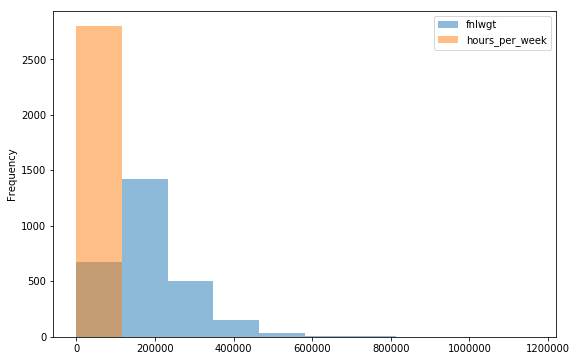

In [1130]:
data.select_dtypes('int').plot.hist(alpha=0.5)

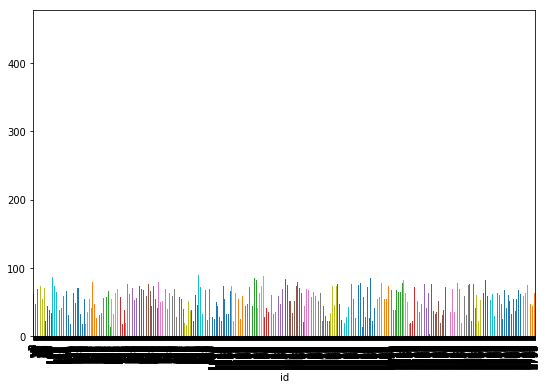

In [1131]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

#df2.plot.bar(stacked=True);
plt.figure()
data['age'].plot.bar()


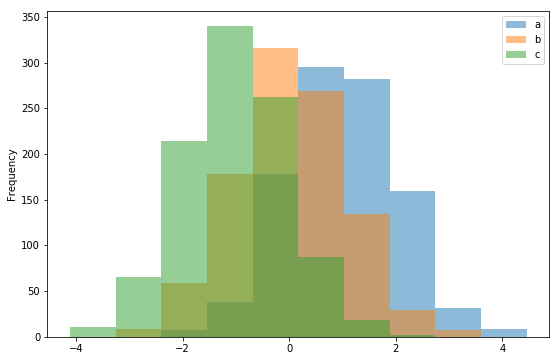

In [1132]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
plt.figure();

df4.plot.hist(alpha=0.5)

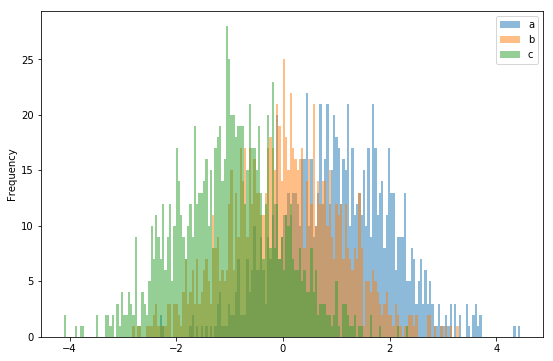

In [1133]:
df4.plot.hist(alpha=0.5, bins=200)

In [1134]:
plt.figure()
df['A'].head()

2000-01-01    0.953082
2000-01-02   -0.396464
2000-01-03    0.659160
2000-01-04    1.421480
2000-01-05   -1.112599
Freq: D, Name: A, dtype: float64

In [1135]:
df['A'].diff().head()

2000-01-01         NaN
2000-01-02   -1.349546
2000-01-03    1.055624
2000-01-04    0.762320
2000-01-05   -2.534078
Freq: D, Name: A, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a48b1dd68>,
      dtype=object)

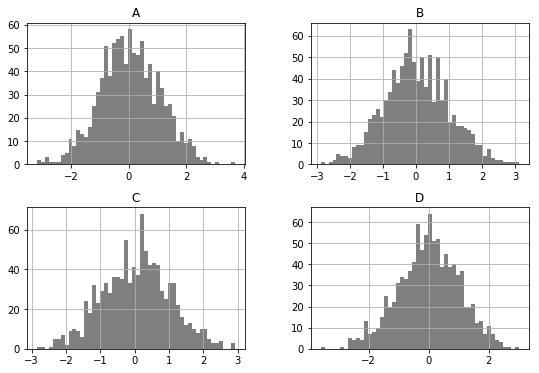

In [1136]:
df.diff().hist(color='k', alpha=0.5, bins=50)

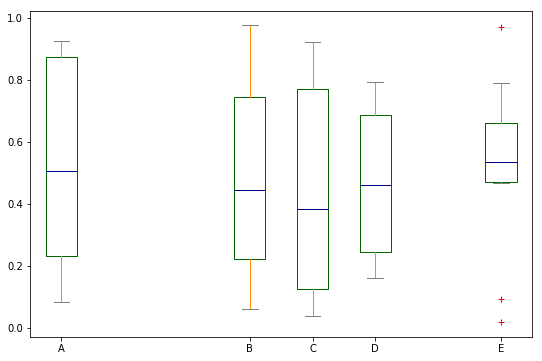

In [1137]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
df.plot.box(color=color, sym='r+', positions=[1, 4, 5, 6, 8])

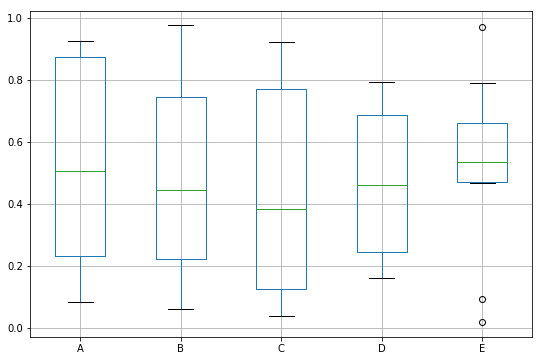

In [1138]:
df.boxplot()

In [1139]:
df = pd.DataFrame(np.random.rand(10,2), columns=['Col1', 'Col2'] )

df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])

plt.figure();
df
#bp = df.boxplot(by='X')

,Col1,Col2,X
0,0.029615,0.498254,A
1,0.911340,0.292410,A
2,0.713017,0.469795,A
3,0.968255,0.301150,A
4,0.538204,0.983120,A
5,0.782574,0.888056,B
6,0.167676,0.926338,B
7,0.436480,0.379160,B
8,0.492461,0.805314,B
9,0.660699,0.431706,B


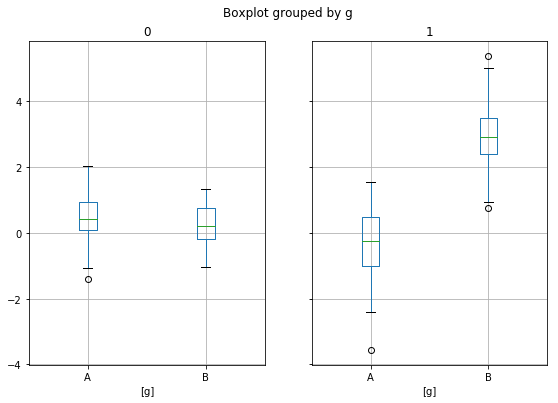

In [1140]:
np.random.seed(1234)
df_box = pd.DataFrame(np.random.randn(50, 2))
df_box['g'] = np.random.choice(['A', 'B'], size=50)
df_box.loc[df_box['g'] == 'B', 1] += 3
bp = df_box.boxplot(by='g')

In [1141]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

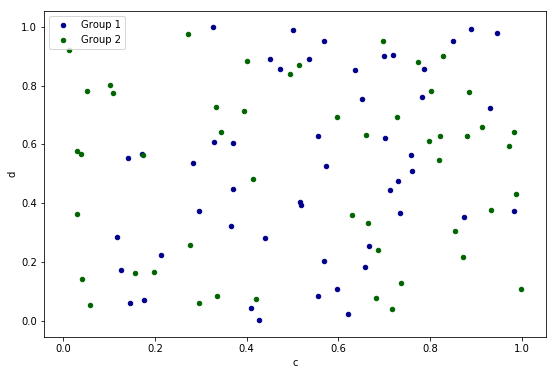

In [1142]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');

df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);

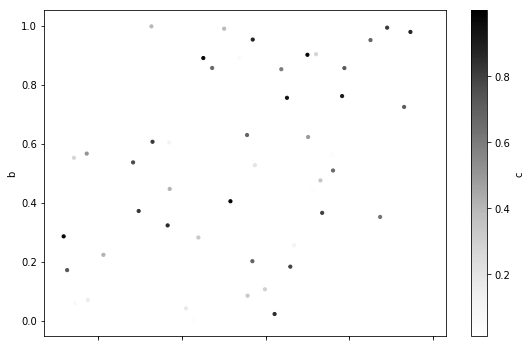

In [1143]:
df.plot.scatter(x='a', y='b', c='c', s=10);

# Zdroje
Príklady ako pracovať s pandas - https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook-plotting

Robenie grafov v pandas - https://pandas.pydata.org/pandas-docs/stable/visualization.html